# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

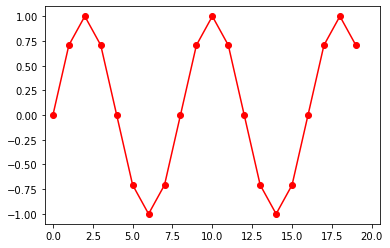

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

# 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
- (대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [5]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [6]:

Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

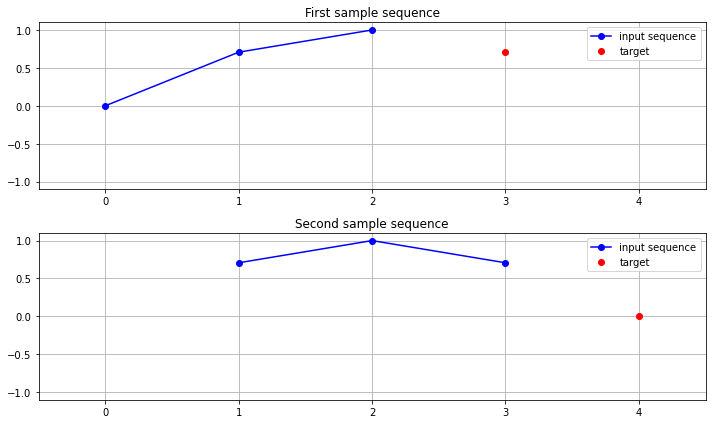

In [7]:

plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='sgd')

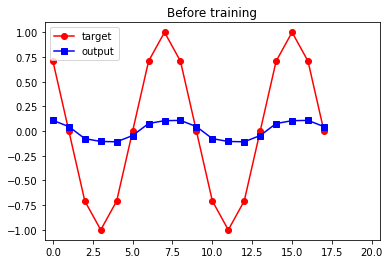

In [11]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [12]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3665
Epoch 2/100
18/18 [==============================] - 0s 54us/step - loss: 0.3462
Epoch 3/100
18/18 [==============================] - 0s 111us/step - loss: 0.3269
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.3087
Epoch 5/100
18/18 [==============================] - 0s 111us/step - loss: 0.2915
Epoch 6/100
18/18 [==============================] - 0s 111us/step - loss: 0.2752
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.2598
Epoch 8/100
18/18 [==============================] - 0s 111us/step - loss: 0.2451
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 0.2313
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.2182
Epoch 11/100
18/18 [==============================] - 0s 54us/step - loss: 0.2058
Epoch 12/100
18/18 [==============================] - 0s 111us/step - loss: 0.1940
Epoch 13/100
18/18 [=

# 결과 확인

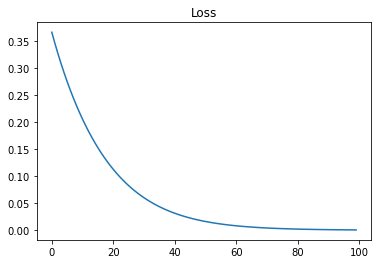

In [13]:

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

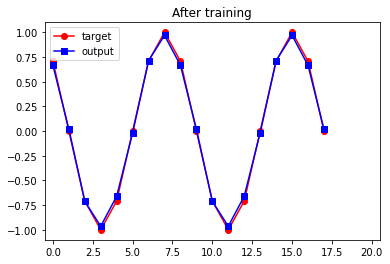

In [18]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [19]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.31113496, -0.5350309 , -0.1710661 , -0.3513309 , -0.58144826,
         0.41476998,  0.3126239 , -0.04758061, -0.43024546, -0.25811166]],
      dtype=float32)>

In [20]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_1/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.29332197, -0.02267686, -0.45017317, -0.06278142,  0.38479894,
        -0.499793  , -0.3209854 , -0.01187507,  0.20133896, -0.40036467],
       [ 0.40109155, -0.18653043, -0.5243529 ,  0.14630622,  0.17135185,
         0.6216256 , -0.09945873, -0.1311867 , -0.1243751 , -0.27204865],
       [-0.19665305, -0.1720411 ,  0.36357763,  0.30392343, -0.11612891,
         0.28862143,  0.17779362,  0.09661648,  0.46272904, -0.6623994 ],
       [-0.07720977,  0.48544714, -0.09584784, -0.17508774, -0.31796277,
         0.290148  , -0.6028821 ,  0.2716179 ,  0.3168384 ,  0.10557304],
       [-0.18821228, -0.29480058, -0.22804125,  0.6970458 , -0.02637194,
         0.12681808, -0.02304816, -0.2356683 ,  0.49735203,  0.49945667],
       [ 0.08335648,  0.07700554,  0.4568554 ,  0.2812518 ,  0.6416771 ,
        -0.04727153, -0.4047447 ,  0.31673926, -0.2945453 ,  0.05634448],
       [ 0.35910776,  0.3381388 , 

In [21]:

# bias
model.weights[2]

<tf.Variable 'simple_rnn_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 1.0906372e-03, -5.2150848e-05,  6.3192711e-04, -6.1487983e-04,
        3.8400162e-03, -1.4719464e-03,  3.9028819e-03, -2.5122187e-03,
       -8.0384471e-04, -1.4883882e-03], dtype=float32)>